In [13]:
#Step 1: Import Relevant Bits of File

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#change this to make universal
print(os.getcwd())
my_directory = '/Users/Apara/Documents/GitHub/hsl_python/SpaceVestibExperiment' 
folder = 'Aw1' #change this based on person



/Users/apara/Documents/GitHub/hsl_python/SpaceVestibExperiment/St1/VANTAN


In [14]:
def import_vantan(rootdir, foldername):

    directory = rootdir + '/' + foldername + '/VANTAN' 

    os.chdir(directory)

    for r, d, files in os.walk(directory):
        for filename in files:
            if "VAN" in filename:
                #Naming Convention Loop
                if 'si' in filename and 'up' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_up_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_up_VAN.append(float(vantan_list[5]))
                elif 'si' in filename and 'p' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_p_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_p_VAN.append(float(vantan_list[5]))
                elif 'st' in filename and 'up' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_up_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_up_VAN.append(float(vantan_list[5]))
                elif 'st' in filename and 'p' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_p_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_p_VAN.append(float(vantan_list[5]))
            elif "TAN" in filename: 
                if 'si' in filename and 'up' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_up_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_up_TAN.append(float(vantan_list[6]))
                elif 'si' in filename and 'p' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_p_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_p_TAN.append(float(vantan_list[6]))
                elif 'st' in filename and 'up' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_up_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_up_TAN.append(float(vantan_list[6]))
                elif 'st' in filename and 'p' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_p_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_p_TAN.append(float(vantan_list[6]))
    vantan_array = np.array([si_up_VAN, si_p_VAN, st_up_VAN, st_p_VAN, si_up_TAN, si_p_TAN, st_up_TAN, st_p_TAN])
    return vantan_array

vantan_array = import_vantan(my_directory, folder)


In [21]:
def vantan_analysis_feats(vt_arr):
    
    means_abs = []
    std = [];
    pos_neg_diff = [];# (# of positive nums) - (#of negative nums)
    
    #mean_abs
    for run in vt_arr:
        means_abs.append(np.mean(abs(run)))
    #change the p runs to be (mean of p runs) - (mean of up runs)
    #for i in [1,3,5,7]:
        #means_abs[i] = (means_abs[i]-means_abs[i-1])
    
    #standard deviation
    for run in vt_arr:
        std.append(np.std(run))
        
    #positive/negative difference
    for run in vt_arr:  
        pos = [];
        neg = [];
        for ind in run:
            if ind > 0:
                pos.append(ind)
            elif ind < 0:
                neg.append(ind)
        pos_neg_diff.append(len(pos)-len(neg))
    return means_abs, std

stats = (vantan_analysis_feats(vantan_array))
print(stats)

([28.849999999999998, 14.5, 32.47777777777778, 23.766666666666666, 0.6222222222222222, 1.7277777777777779, 0.7388888888888889, 1.261111111111111], [19.663481380467704, 13.416035181826262, 6.332768005957894, 7.84743411709982, 0.6516834799384524, 0.8173466556826152, 0.31996334666626514, 0.4668319813010159])


In [22]:
df_VAN = pd.DataFrame({"Position":["Sitting", "Standing"], 
                   "mean_up":[stats[0][0], stats[0][1]],
                    "mean_p": [stats[0][2], stats[0][3]],
                   "sd_up":[stats[1][0],stats[1][1]],
                    "sd_p":[stats[1][2],stats[1][3]]})

df_TAN = pd.DataFrame({"Position":["Sitting", "Standing"], 
                   "mean_up":[stats[0][4], stats[0][5]],
                    "mean_p": [stats[0][6], stats[0][7]],
                   "sd_up":[stats[1][4],stats[1][5]],
                    "sd_p":[stats[1][6],stats[1][7]]})


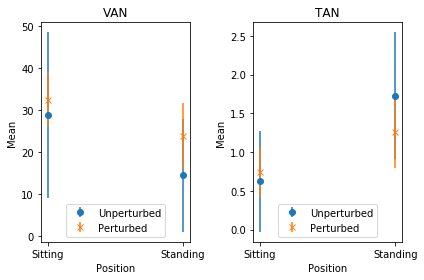

In [23]:
plt.subplot(1,2,1)
plt.errorbar(np.arange(len(df_VAN['Position'])), df_VAN['mean_up'], yerr=df_VAN['sd_up'], ls='None', marker='o')
plt.errorbar(np.arange(len(df_VAN['Position'])), df_VAN['mean_p'], yerr=df_VAN['sd_p'], ls='None', marker='x')
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(len(df_VAN['Position'])))
ax.xaxis.set_ticklabels(df_VAN['Position'], )
plt.xlabel("Position")
plt.ylabel("Mean")
plt.title('VAN')
plt.legend(['Unperturbed', 'Perturbed'], loc = 'lower center')

plt.subplot(1,2,2)
plt.errorbar(np.arange(len(df_TAN['Position'])), df_TAN['mean_up'], yerr=df_TAN['sd_up'], ls='None', marker='o')
plt.errorbar(np.arange(len(df_TAN['Position'])), df_TAN['mean_p'], yerr=df_TAN['sd_p'], ls='None', marker='x')
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(len(df_TAN['Position'])))
ax.xaxis.set_ticklabels(df_TAN['Position'], )
plt.xlabel("Position")
plt.ylabel("Mean")
plt.tight_layout()
plt.title('TAN')
plt.legend(['Unperturbed', 'Perturbed'], loc = 'lower center')
plt.show()
